# Construyendo Self Avoiding Walk

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def C_plano(m,n):
    if m < 3 or n < 3:
        raise Exception('m and n must be greater than 3')
    plano = np.zeros((m,n))
    plano[0,:] = 1.0
    plano[m-1,:] = 1.0
    plano[:,0] = 1.0
    plano[:,n-1] = 1.0
    return plano

In [75]:
C_plano(13,13)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [5]:
def check_surr(plano_b, m, n):
    dir = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
    vecinos = dir + [m, n]
    valores = plano_b[vecinos[:, 0], vecinos[:, 1]]
    indices_cero = np.where(valores == 0)[0]
    if len(indices_cero) == 0:
        return False
    indice_aleatorio = np.random.choice(indices_cero)
    nueva_pos = vecinos[indice_aleatorio]
    return nueva_pos[0], nueva_pos[1], len(indices_cero)

In [50]:
def graficar_camino(coord_list, m, n):
    if not coord_list:
        raise ValueError("La lista de coordenadas está vacía")

    xs, ys = zip(*coord_list)

    plt.figure(figsize=(n / 2, m / 2))
    plt.plot(xs, ys, color='red', linewidth=2)
    plt.xlim(0, n-1)
    plt.ylim(0, m-1)

    plt.grid(True)
    plt.xticks(range(n))
    plt.yticks(range(m))
    plt.gca().set_aspect('equal')
    plt.title('Self Avoiding Walk')
    plt.show()

In [82]:
def construir_camino(p, q):
    plano = C_plano(p, q)
    plano[1,1] = 1.0
    cord_x, cord_y = 1, 1
    listado = [[cord_x, cord_y]]
    k_j = []
    while check_surr(plano, cord_x, cord_y):
        cord_x, cord_y, num_k = check_surr(plano, cord_x, cord_y)
        listado.append([cord_x, cord_y])
        k_j.append(num_k)
        plano[cord_x, cord_y] = 1.0
        if num_k < 0:
            raise Exception(f"num_k = {num_k}")
    return listado, k_j

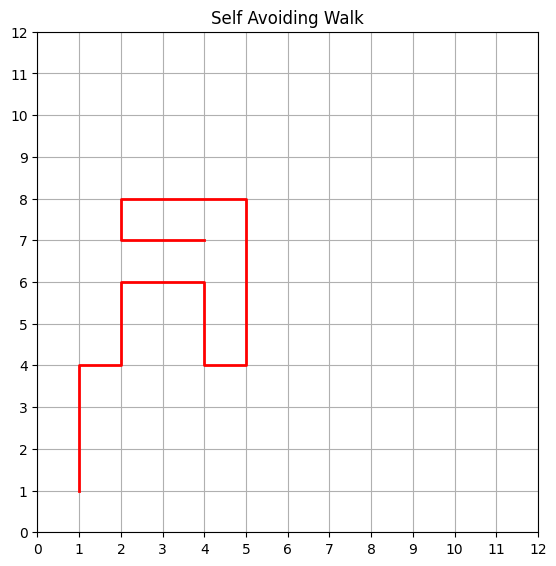

In [83]:
try2, k_j= construir_camino(13, 13)
graficar_camino(try2, 13, 13)

Diseño 1 de g(x)

In [84]:
def aproximacion_g1(exp, m, n):
    num_per_len = np.zeros(122)
    num_per_size = []
    sum_theta = 0.0
    for i in range(1,10**exp+1):
        for j in range(1,exp+1):
            if i == 10**j:
                print(f"Se encuentra en iteración: 10**{j}")
        camino, probabilidades = construir_camino(m, n)
        longitud = len(camino) - 1
        prob_parcial = np.prod(probabilidades)/i
        sum_theta += prob_parcial
        num_per_len[longitud] += 1
        num_per_size.append(sum_theta)

    return num_per_len, num_per_size

In [93]:
per_len_g1, per_size_g1 = aproximacion_g1(6, 13, 13)

Se encuentra en iteración: 10**1
Se encuentra en iteración: 10**2
Se encuentra en iteración: 10**3
Se encuentra en iteración: 10**4
Se encuentra en iteración: 10**5


In [99]:
def graficar_resultados(num_per_len, num_per_size):
    # Frecuencia de longitudes
    plt.figure(figsize=(10, 10))
    plt.bar(range(len(num_per_len)), num_per_len, color='skyblue')
    plt.xlabel("Longitud del camino")
    plt.ylabel("Número de ocurrencias")
    plt.title("Distribución de longitudes")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Convergencia de la aproximación
    plt.figure(figsize=(10, 10))
    x_vals = np.arange(1, len(num_per_size) + 1)
    y_vals = np.array(num_per_size)
    plt.ylim(np.min(y_vals), np.max(y_vals)*10)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(x_vals, y_vals, color='orange')
    plt.xlabel("Iteración (log)")
    plt.ylabel("Aproximación (log)")
    plt.title("Convergencia de la aproximación")
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

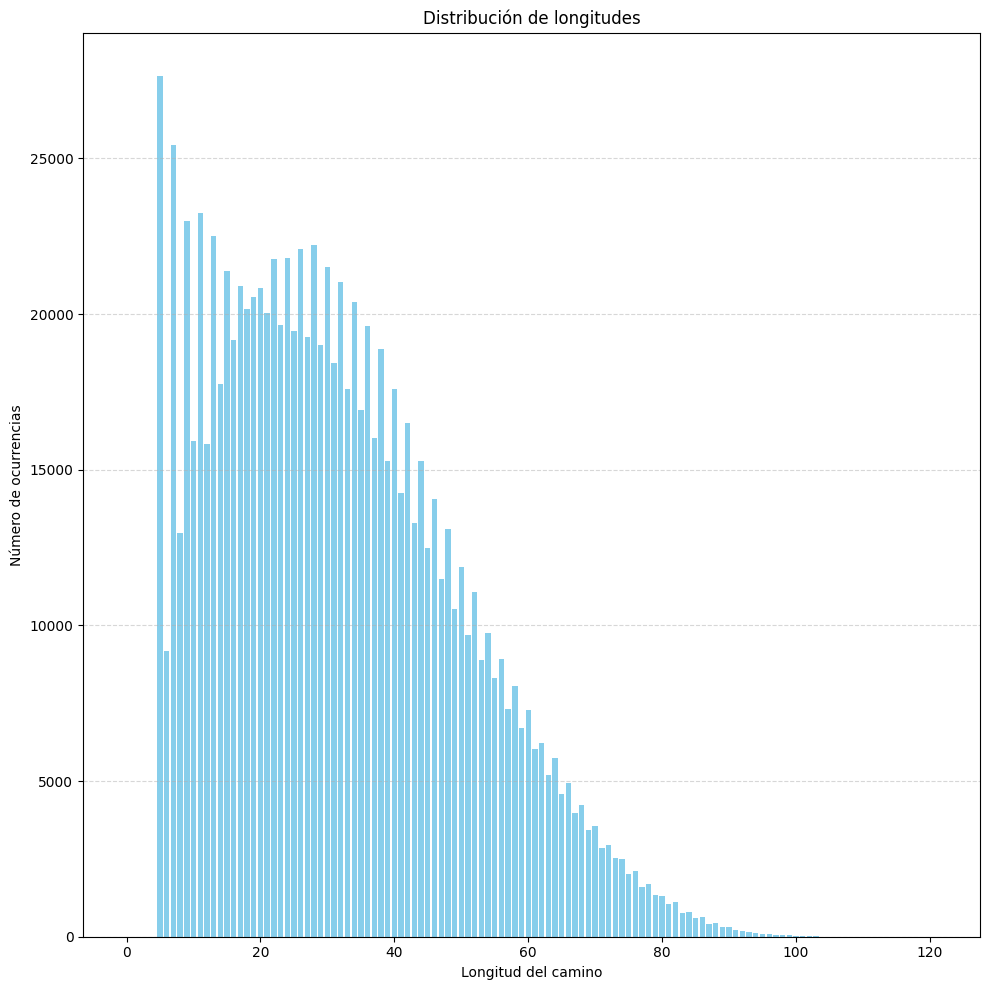

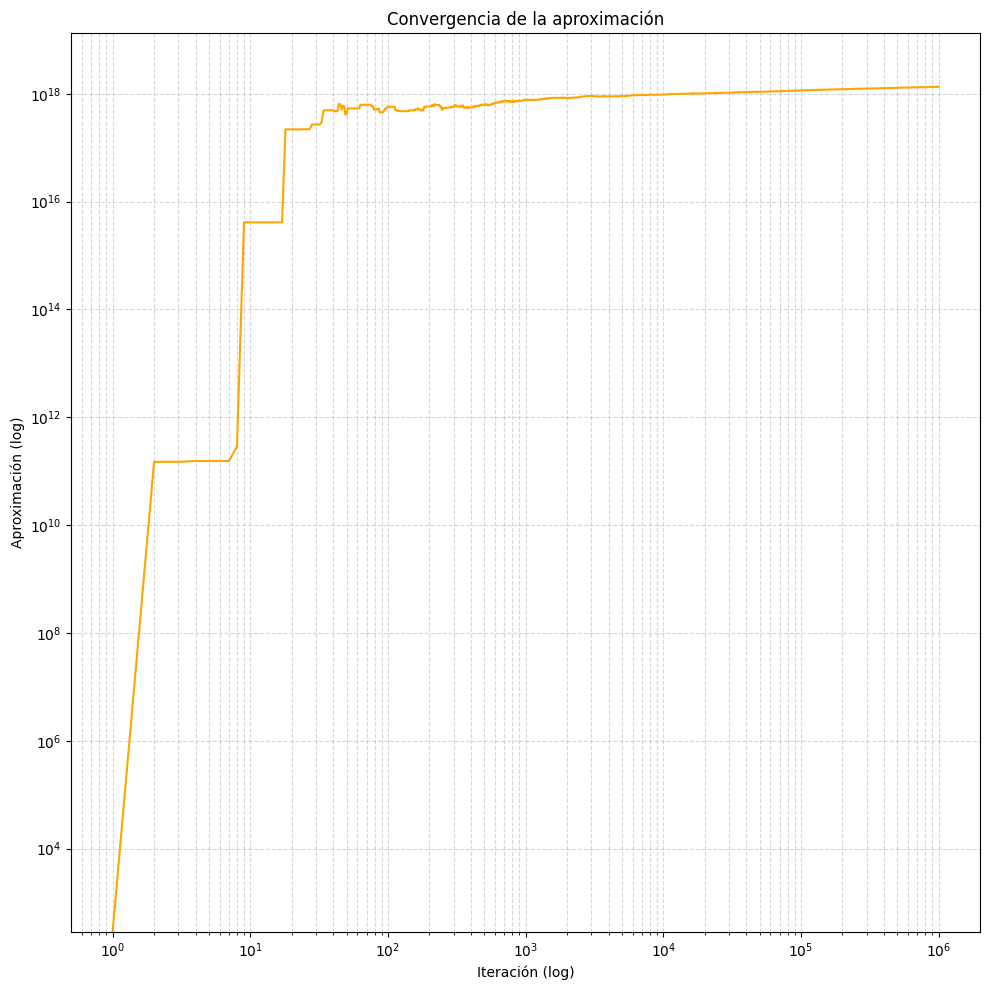

In [100]:
graficar_resultados(per_len_g1, per_size_g1)